In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

import seaborn as sns

%matplotlib inline

C:\Users\Abhishek\Anaconda2\lib\site-packages\matplotlib\__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [3]:
train = pd.read_csv('./data/Train_UWu5bXk.csv')
test = pd.read_csv('./data/Test_u94Q5KV.csv')

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8523 entries, 0 to 8522
Data columns (total 12 columns):
Item_Identifier              8523 non-null object
Item_Weight                  7060 non-null float64
Item_Fat_Content             8523 non-null object
Item_Visibility              8523 non-null float64
Item_Type                    8523 non-null object
Item_MRP                     8523 non-null float64
Outlet_Identifier            8523 non-null object
Outlet_Establishment_Year    8523 non-null int64
Outlet_Size                  6113 non-null object
Outlet_Location_Type         8523 non-null object
Outlet_Type                  8523 non-null object
Item_Outlet_Sales            8523 non-null float64
dtypes: float64(4), int64(1), object(7)
memory usage: 865.6+ KB


In [5]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5681 entries, 0 to 5680
Data columns (total 11 columns):
Item_Identifier              5681 non-null object
Item_Weight                  4705 non-null float64
Item_Fat_Content             5681 non-null object
Item_Visibility              5681 non-null float64
Item_Type                    5681 non-null object
Item_MRP                     5681 non-null float64
Outlet_Identifier            5681 non-null object
Outlet_Establishment_Year    5681 non-null int64
Outlet_Size                  4075 non-null object
Outlet_Location_Type         5681 non-null object
Outlet_Type                  5681 non-null object
dtypes: float64(3), int64(1), object(7)
memory usage: 532.6+ KB


In [7]:
train.head(3)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700


## Relationship between MRP and Sales

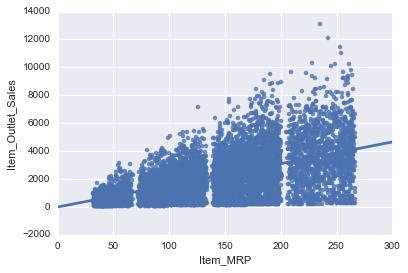

In [8]:
sns.regplot(x='Item_MRP', y='Item_Outlet_Sales', data=train);

In [104]:
from sklearn.pipeline import Pipeline
from sklearn.cross_validation import train_test_split
from sklearn.grid_search import GridSearchCV
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.preprocessing import PolynomialFeatures, StandardScaler

from sklearn.metrics import mean_squared_error

In [105]:
X_train, X_test, y_train, y_test = train_test_split(train[['Item_MRP', 'Item_Visibility', 'Outlet_Establishment_Year']], train.Item_Outlet_Sales, test_size=0.2, random_state=44)

In [106]:
polynomial_features = PolynomialFeatures()
scaler = StandardScaler()
ridge = Ridge()

param_grid_pipeline = {'ridge__alpha': 10. ** np.arange(-2, 2), 'poly__degree': [2, 3, 4]}
linear_pipe = Pipeline([('scaler', scaler), ('poly', polynomial_features), ('ridge', ridge)])

grid = GridSearchCV(linear_pipe, param_grid=param_grid_pipeline, cv=5, scoring='mean_squared_error')

In [107]:
grid.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=Pipeline(steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('poly', PolynomialFeatures(degree=2, include_bias=True, interaction_only=False)), ('ridge', Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, solver='auto', tol=0.001))]),
       fit_params={}, iid=True, loss_func=None, n_jobs=1,
       param_grid={'poly__degree': [2, 3, 4], 'ridge__alpha': array([  0.01,   0.1 ,   1.  ,  10.  ])},
       pre_dispatch='2*n_jobs', refit=True, score_func=None,
       scoring='mean_squared_error', verbose=0)

In [108]:
print grid.best_params_

{'poly__degree': 4, 'ridge__alpha': 10.0}


In [109]:
est = grid.best_estimator_
est.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('poly', PolynomialFeatures(degree=4, include_bias=True, interaction_only=False)), ('ridge', Ridge(alpha=10.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, solver='auto', tol=0.001))])

In [110]:
predsTrain = est.predict(X_train)
predsTest = est.predict(X_test)

In [111]:
print 'RMSE on training set %f ' %(np.sqrt(mean_squared_error(y_train, predsTrain)))
print 'RMSE on test set %f ' %(np.sqrt(mean_squared_error(y_test, predsTest)))

RMSE on training set 1348.774680 
RMSE on test set 1281.217687 


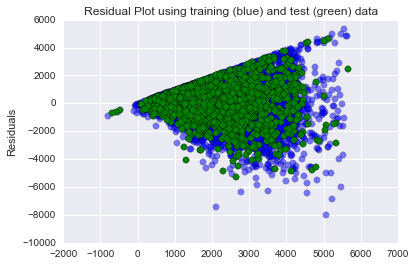

In [112]:
plt.scatter(predsTrain, predsTrain - y_train, c='b', s=40, alpha=0.5)
plt.scatter(predsTest, predsTest - y_test, c='g', s=40)
plt.hlines(y = 0, xmin=0, xmax = 50)
plt.title('Residual Plot using training (blue) and test (green) data')
plt.ylabel('Residuals');

In [113]:
# fit on the full dataset
est.fit(train[['Item_MRP', 'Item_Visibility', 'Outlet_Establishment_Year']], train.Item_Outlet_Sales)

Pipeline(steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('poly', PolynomialFeatures(degree=4, include_bias=True, interaction_only=False)), ('ridge', Ridge(alpha=10.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, solver='auto', tol=0.001))])

In [114]:
predictions = est.predict(test[['Item_MRP', 'Item_Visibility', 'Outlet_Establishment_Year']])

In [115]:
submissions = pd.read_csv('./data/SampleSubmission_TmnO39y.csv')

In [116]:
submissions['Item_Outlet_Sales'] = predictions

In [117]:
submissions.to_csv('./submissions/third.csv', index=False)